## Libraries

In [1]:
# Libraries

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

c:\ProgramData\anaconda3\envs\course02450\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Read Data

In [2]:
# Read training data
df = pd.read_csv('DST_BIL54.csv')
#print(df.info())

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'] + '-01', format='%Y-%m-%d', utc=True)
#print(df['time'])
#print(df['time'].dtype)

# Year to month for each of them
#df['year'] = df['time'].dt.year + df['time'].dt.month / 12
df['year'] = df['time'].dt.year + ((df['time'].dt.month-1) / 12)

# Make the output variable a floating point (i.e., decimal number)
df['total'] = df['total'].astype(float) / 1E6

# Round the 'total' column to 3 decimal points
df['total'] = df['total'].round(3)
df['year'] = df['year'].round(3)

# Divide into train and test set
test_start = pd.Timestamp('2024-01-01', tz='UTC')
df_train = df[df['time'] < test_start]
df_test = df[df['time'] >= test_start]

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   time          84 non-null     datetime64[ns, UTC]
 1   total         84 non-null     float64            
 2   gasoline      84 non-null     int64              
 3   diesel        84 non-null     int64              
 4   fgas          84 non-null     int64              
 5   ngas          84 non-null     int64              
 6   electricity   84 non-null     int64              
 7   petroleum     84 non-null     int64              
 8   hydrogen      84 non-null     int64              
 9   methanol      84 non-null     int64              
 10  ethanol       84 non-null     int64              
 11  pluginhybrid  84 non-null     int64              
 12  otherfuels    84 non-null     int64              
 13  year          84 non-null     float64            
dtypes: datetime6

In [3]:
# Dimensions check and head
print('Dimensions check')
print(np.shape(df))
print(np.shape(df_train))
print(np.shape(df_test))

df.head()

Dimensions check
(84, 14)
(72, 14)
(12, 14)


,time,total,gasoline,diesel,fgas,ngas,electricity,petroleum,hydrogen,methanol,ethanol,pluginhybrid,otherfuels,year
0,2018-01-01 00:00:00+00:00,2.930,1781826,1136656,12,256,9304,0,81,0,0,2340,8,2018.000
1,2018-02-01 00:00:00+00:00,2.934,1783338,1138414,12,255,9343,0,80,0,0,2593,9,2018.083
2,2018-03-01 00:00:00+00:00,2.941,1787219,1141576,12,257,9399,0,77,0,0,2873,9,2018.167
3,2018-04-01 00:00:00+00:00,2.951,1793554,1144846,12,257,9548,0,77,0,0,3195,9,2018.250
4,2018-05-01 00:00:00+00:00,2.963,1799795,1149840,12,256,9665,0,77,0,0,3439,9,2018.333


In [4]:
# Keep data of interest

X=df_train['year']
y=df_train['total']

print(X.head())
print(y.head())

0    2018.000
1    2018.083
2    2018.167
3    2018.250
4    2018.333
Name: year, dtype: float64
0    2.930
1    2.934
2    2.941
3    2.951
4    2.963
Name: total, dtype: float64


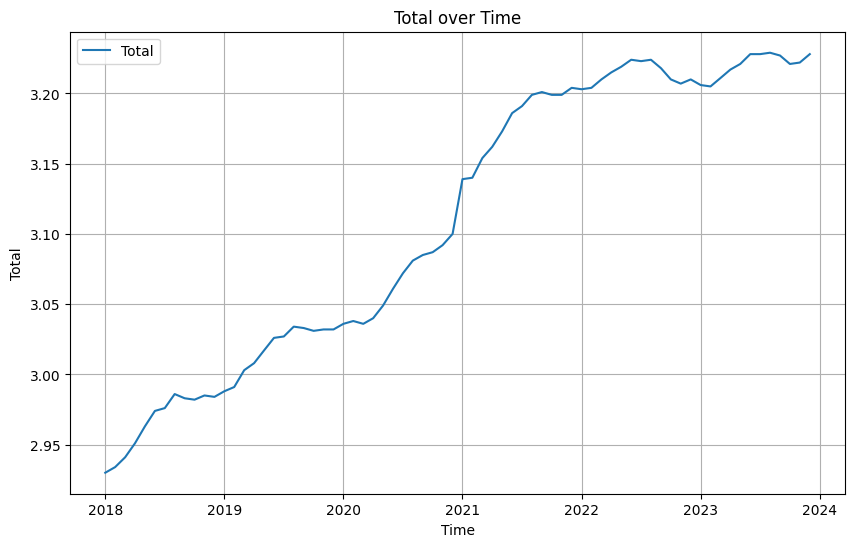

In [5]:
# plot data 

plt.figure(figsize=(10, 6))
plt.plot(X, y, label='Total')
plt.xlabel('Time')
plt.ylabel('Total')
plt.title('Total over Time')
plt.legend()
plt.grid(True)
plt.show()